<a href="https://colab.research.google.com/github/pratyushnandi/DETECTIFY/blob/main/Safety_Helmet_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.5 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load YOLOv8n model
model = YOLO('yolov8n.pt')

# Check model architecture
model.info()

NameError: name 'YOLO' is not defined

helmet model training

In [ ]:
model.train(
    data='/content/drive/MyDrive/archive (1)/HelmetViolationsV2/data.yaml',  # Path to the data.yaml file
    epochs=50,  # Number of epochs
    imgsz=640,  # Image size
    batch=16,  # Batch size
    project='/content/drive/MyDrive/archive (1)/HelmetViolationsV2',  # Save results in the same directory
    name='helmet_violation_yolov8',  # Name of the experiment
    device=0,  # Use GPU
    save_period=1
)

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/archive (1)/HelmetViolationsV2/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=helmet_violation_yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7af624744230>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
results = model.val()

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 30.8±13.2 MB/s, size: 52.6 KB)
val: Scanning /content/drive/MyDrive/archive (1)/HelmetViolationsV2/valid/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 30/30 53.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 2.0it/s 1.0s
                   all         30         38      0.868      0.908      0.989      0.775
                 Plate         30         30      0.931      0.901      0.977      0.693
            WithHelmet          5          5          1      0.822      0.995      0.865
         WithoutHelmet          3          3      0.674          1      0.995      0.768
Speed: 5.2ms preprocess, 6.0ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /content/r

In [ ]:
model = YOLO('/content/drive/MyDrive/archive (1)/HelmetViolationsV2/helmet_violation_yolov8/weights/best.pt')

In [ ]:
results = model.val(
    data='/content/drive/MyDrive/archive (1)/HelmetViolationsV2/data.yaml',  # Path to your YAML file
    split='test',  # Specify that you want to evaluate on the test set
    imgsz=640,  # Image size
    batch=16,  # Batch size
    project='/content/drive/MyDrive/archive (1)/HelmetViolationsV2',
    name='test_evaluation'
)

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 0.1±0.1 MB/s, size: 56.2 KB)
val: Scanning /content/drive/MyDrive/archive (1)/HelmetViolationsV2/test/labels... 11 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 11/11 1.5it/s 7.2s
val: New cache created: /content/drive/MyDrive/archive (1)/HelmetViolationsV2/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 1.6it/s 0.6s
                   all         11         15      0.958      0.522      0.625      0.467
                 Plate         10         11          1      0.898      0.988      0.664
            WithHelmet          1          1          1          0      0.166     0.0498
         WithoutHelmet          3          3      0.875      0.667      0.721      0.688
Speed: 1.5ms preprocess,

testing on images

In [ ]:
# Define the path to your test images
test_images_path = '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/test/images'

# Run inference
inference_results = model.predict(
    source=test_images_path,  # Path to the folder containing test images
    save=True,  # Save the prediction images with bounding boxes
    save_txt=True,  # Save the prediction labels in .txt format
    project='/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images',
    name='inference_results'  # Folder name for the inference results
)



image 1/11 /content/drive/MyDrive/archive (1)/HelmetViolationsV2/test/images/1111_jpg.rf.34849ea019d0a1a70bde873ffd4fde0f.jpg: 640x640 (no detections), 7.4ms
image 2/11 /content/drive/MyDrive/archive (1)/HelmetViolationsV2/test/images/139_jpg.rf.ada2dd8796caecf74ec9c7a3e433b11e.jpg: 640x640 1 Plate, 7.9ms
image 3/11 /content/drive/MyDrive/archive (1)/HelmetViolationsV2/test/images/20_jpg.rf.42c59d2862457f9cf49be3ce5f83842c.jpg: 640x640 2 Plates, 33.4ms
image 4/11 /content/drive/MyDrive/archive (1)/HelmetViolationsV2/test/images/22_jpg.rf.9e56891720926c1daf42bf94080b42d0.jpg: 640x640 1 Plate, 1 WithoutHelmet, 11.1ms
image 5/11 /content/drive/MyDrive/archive (1)/HelmetViolationsV2/test/images/340_jpg.rf.7a47ebce85bfd401da688f75d3d7dcf7.jpg: 640x640 1 Plate, 7.3ms
image 6/11 /content/drive/MyDrive/archive (1)/HelmetViolationsV2/test/images/40_jpg.rf.0197b43d3cb4ef73b99e3329391a10da.jpg: 640x640 3 Plates, 7.4ms
image 7/11 /content/drive/MyDrive/archive (1)/HelmetViolationsV2/test/images/6

dusplaying result

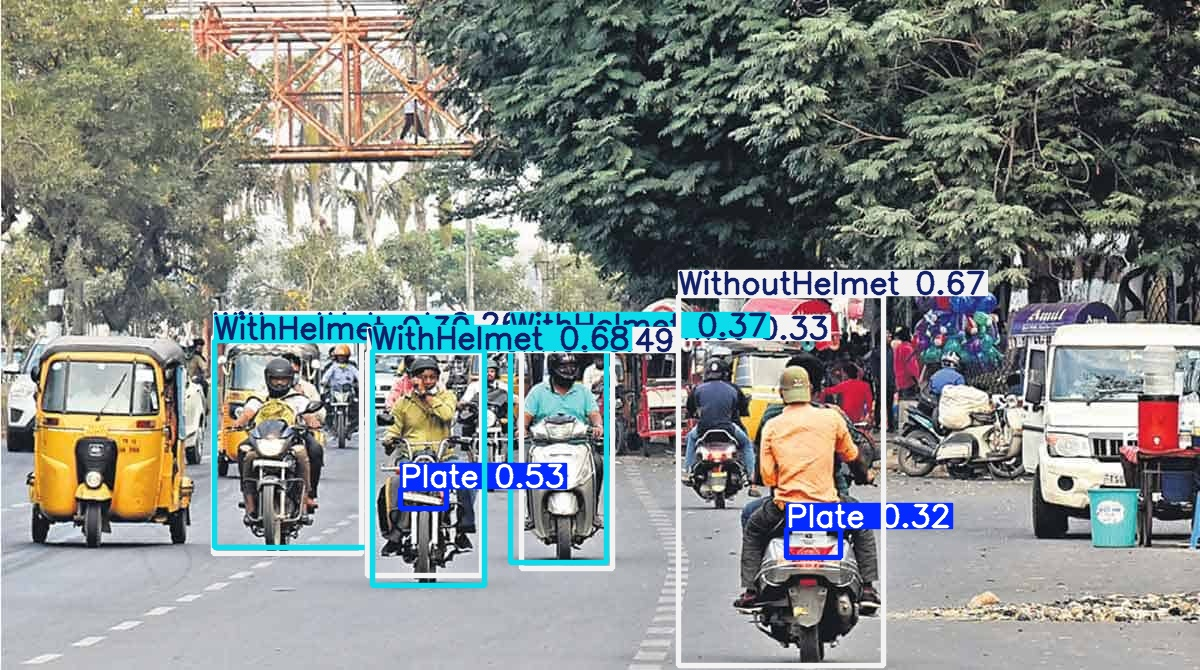

['/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/Helmet-riders.jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/helmetless.jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (30).jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (33).jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (49).jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (71).jpg']


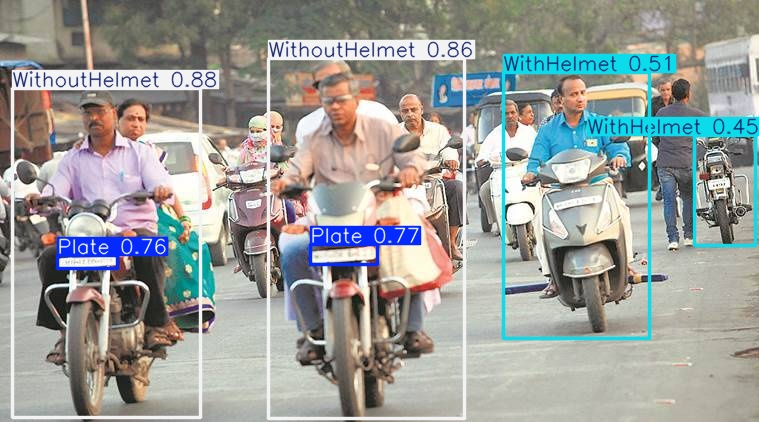

['/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/Helmet-riders.jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/helmetless.jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (30).jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (33).jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (49).jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (71).jpg']


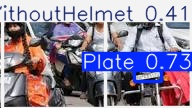

['/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/Helmet-riders.jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/helmetless.jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (30).jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (33).jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (49).jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (71).jpg']


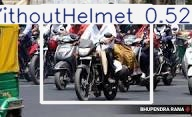

['/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/Helmet-riders.jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/helmetless.jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (30).jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (33).jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (49).jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (71).jpg']


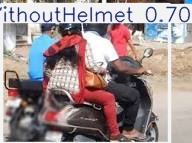

['/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/Helmet-riders.jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/helmetless.jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (30).jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (33).jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (49).jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (71).jpg']


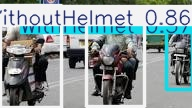

['/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/Helmet-riders.jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/helmetless.jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (30).jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (33).jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (49).jpg', '/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/images (71).jpg']


In [ ]:
from IPython.display import Image, display
import glob

# Display a few inference results
result_images = glob.glob('/content/drive/MyDrive/archive (1)/HelmetViolationsV2/images/inference_results/*.jpg')
for image_path in result_images:  # Display the first 5 images
    display(Image(filename=image_path))
    print(result_images)


traffic light detection

In [ ]:
results = model.val()

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 14.8±8.7 MB/s, size: 30.8 KB)
val: Scanning /content/drive/MyDrive/Traffic light.v1i.yolov8/valid/labels.cache... 224 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 224/224 84.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 2.6it/s 5.5s
                   all        224        324      0.928      0.875      0.944      0.592
     red traffic light        224        324      0.928      0.875      0.944      0.592
Speed: 3.7ms preprocess, 5.1ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to /content/runs/detect/val


In [ ]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/archive (1)/HelmetViolationsV2/helmet_violation_yolov8/weights/best.pt')
metrics = model.val()

precision = metrics.box.mp * 100
recall = metrics.box.mr * 100
map50 = metrics.box.map50 * 100
map5095 = metrics.box.map * 100

print("\nMODEL ACCURACY:")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"mAP50: {map50:.2f}%")
print(f"mAP50-95: {map5095:.2f}%")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 0.1±0.0 MB/s, size: 48.8 KB)
val: Scanning /content/drive/MyDrive/archive (1)/HelmetViolationsV2/valid/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 30/30 39.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 6.2s/it 12.4s
                   all         30         38      0.868      0.908      0.989      0.775
                 Plate         30         30      0.931      0.901

In [ ]:
val_images_path = "/content/drive/MyDrive/archive (1)/HelmetViolationsV2/valid/images"
val_labels_path = "/content/drive/MyDrive/archive (1)/HelmetViolationsV2/valid/labels"
model_path = "/content/drive/MyDrive/archive (1)/HelmetViolationsV2/helmet_violation_yolov8/weights/best.pt"


Skipping class Plate (only one label type present)


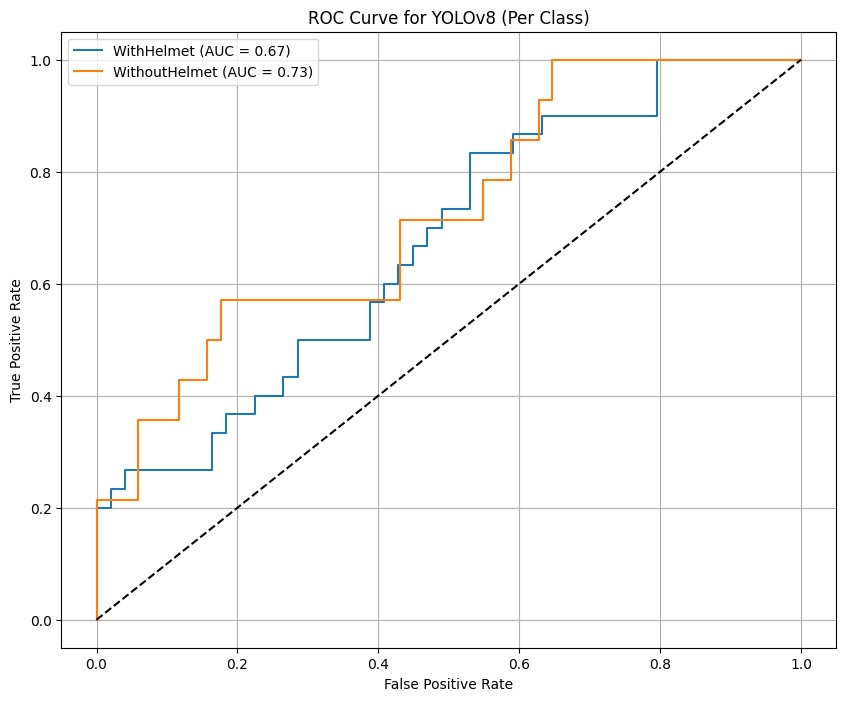

In [ ]:
plt.figure(figsize=(10, 8))

for cls in range(num_classes):
    y_true = np.array(all_trues[cls])
    y_score = np.array(all_scores[cls])

    # Skip invalid classes
    if len(np.unique(y_true)) < 2:
        print(f"Skipping class {class_names[cls]} (only one label type present)")
        continue

    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{class_names[cls]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for YOLOv8 (Per Class)")
plt.legend()
plt.grid()
plt.show()
